1. Using Implicit Solvers for Coupled Systems
Python's scipy provides implicit solvers, such as solve_ivp with the "Radau" or "BDF" methods, which can handle implicit equations and systems with higher-order derivatives directly. 

BUT! that will not happen with geodesic equation so ODEINT is safe to use!

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


The Christoffel symbols calculated symbolically and inserted into the geodesic equation.

$s$ is the parametrization:

# $\frac{d^2\theta}{ds^2}-sin\theta cos\theta (\frac{d\phi}{ds})^2  = 0$

# $\frac{d^2\phi}{ds^2}-2ctg\theta \frac{d\phi}{ds} \frac{d\theta}{ds} = 0$

With substitutions:

# $\frac{dy_1}{ds} - sin(\theta)cos(\theta) y^2=0$
# $\frac{dy_2}{ds} + 2ctg(\theta)y_1y_2=0$


In [2]:
def func(y,lamda):
    theta  = y[0]
    y1 = y[1]
    phi  = y[2]
    y2 = y[3]  
    dy1 = -2*np.cos(theta)*np.sin(theta) * y1 * y2**2
    dy2 = -2*y1*y2*np.cos(theta)/np.cos(theta)
    
    return [y1,dy1,y2,dy2]

In [3]:
R = 1
theta_0 = 1
phi_0 = 0
# Initial velocities for circular orbit
y1_0 = 10
y2_0 = 0

lamda = np.linspace(-20,20,10000)

ini = [theta_0,y1_0,phi_0,y2_0]

sol=odeint(func,ini,lamda) 
theta = sol[:,0]
phi = sol[:,2]

In [4]:
x = np.sin(theta)*np.cos(phi)
y = np.sin(theta)*np.sin(phi)
z = np.cos(theta)

In [5]:
u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
X = np.cos(u)*np.sin(v)
Y = np.sin(u)*np.sin(v)
Z = np.cos(v)

Text(0.5, 0, '$z$')

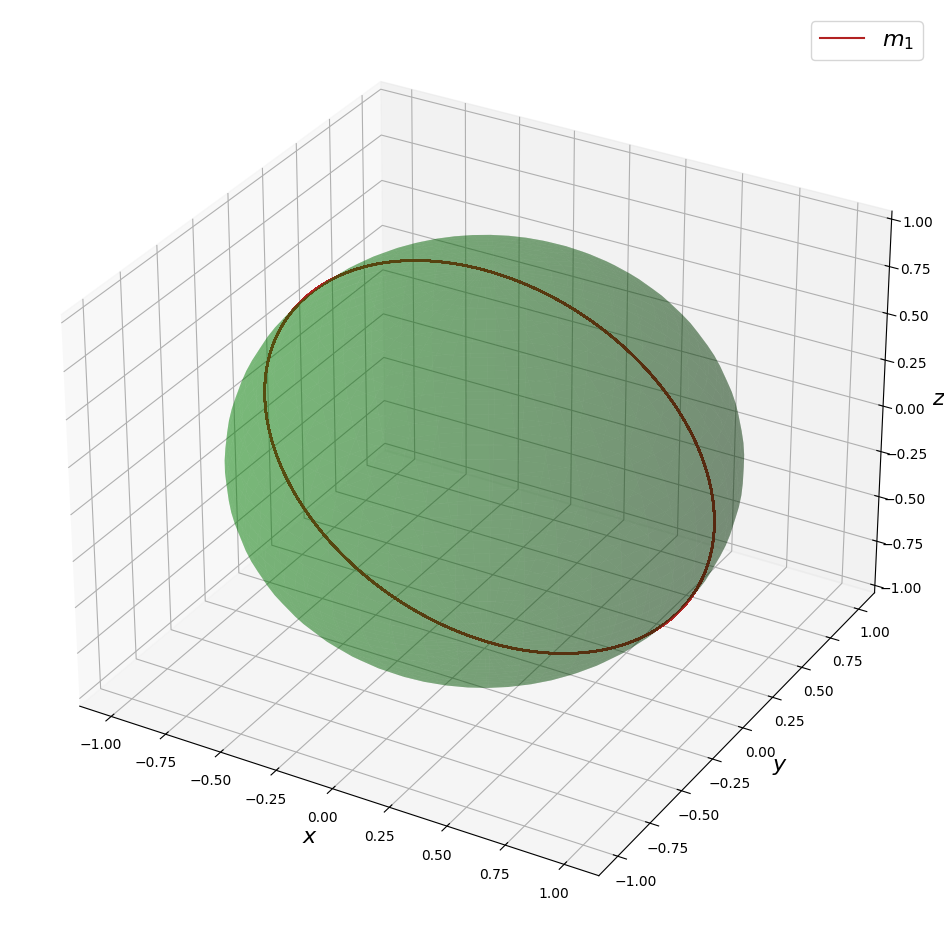

In [6]:
fig10 = plt.figure(10,figsize=(12,12))
ax = fig10.add_subplot(111, projection='3d')
ax.plot3D(x, y, z, color='firebrick',label=r'$m_1$')

ax.plot_surface(X, Y, Z, color="g", alpha=0.3)

plt.legend(fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_zlabel(r'$z$',fontsize=16)

Spherical geodesics are great circles on a sphere, the most flat curves on a sphere.